# Assignment 2 Computer Vision

I Putu Krisna Dharma Saputra/2301924353

1. Implement image low pass filtering with FFT using CV2 and Numpy (in python notebook
please) as shown in the following figures (You may use your own images).please) as shown in the following figures (You may use your own images).

In [1]:
# Import Library

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Read Image
img = cv2.imread('kereta.jpg')

In [3]:
# Function to generate spectrum of Image
def dft(img, axes):
    dft = np.fft.fft2(img, axes=axes) # do fft as complex output
    dft_shift = np.fft.fftshift(dft) # apply shift of origin to the center of image
    mag = np.abs(dft_shift) # generate spectrum from magnitude image (usually for viewing

    spec = np.log(mag) / 20
    return spec

In [4]:
# Gaussian Blur Function
def gauss_blur(img,xy):
    blur_img = cv2.GaussianBlur(img, xy, cv2.BORDER_DEFAULT)
    return blur_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


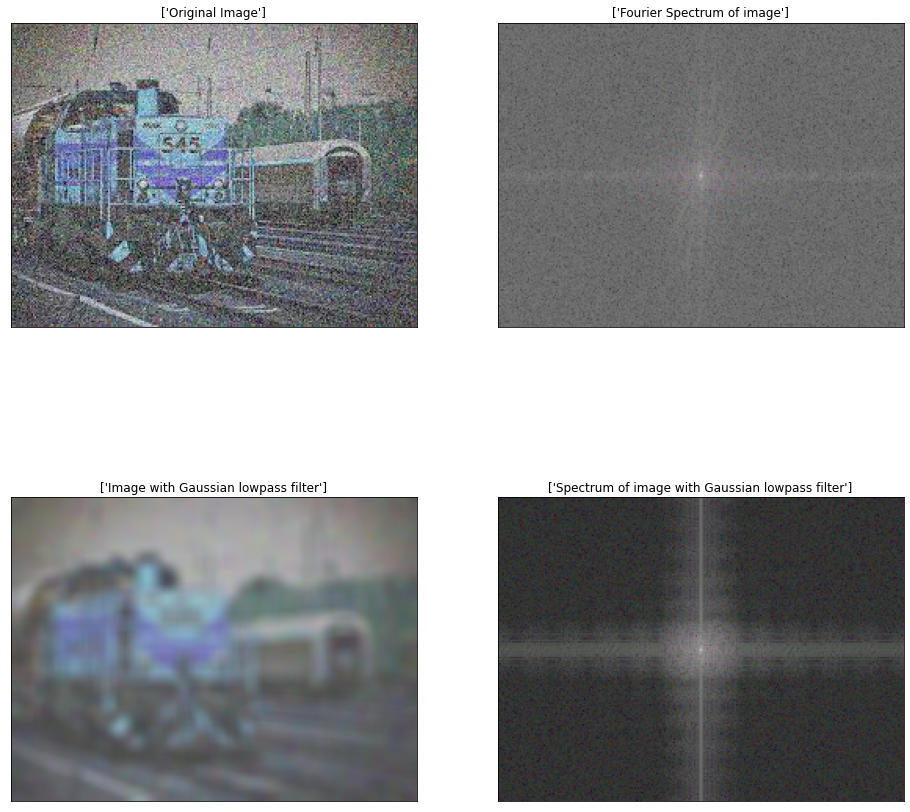

In [5]:
spec = dft(img,(0,1))
gauss_img = gauss_blur(img,(11,11))
gauss_spec = dft(gauss_img,(0,1))
img_list = [img,spec,gauss_img, gauss_spec]
title = ["Original Image","Fourier Spectrum of image",
         "Image with Gaussian lowpass filter","Spectrum of image with Gaussian lowpass filter"]

plt.figure(figsize = (16,16))
for i in range(len(img_list)):
    plt.subplot(2,2,i+1)
    plt.title([title[i]])
    plt.imshow(img_list[i],cmap="RdGy")
    plt.yticks([]),plt.xticks([])

2. Similar like task #1, but now try to implement image high pass filtering.

In [6]:
# New Gaussian Blur Function
def new_gauss_blur(img,xy):
    blur_img = cv2.GaussianBlur(img, xy, cv2.BORDER_DEFAULT) + 127
    hp = img - blur_img
    return hp

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


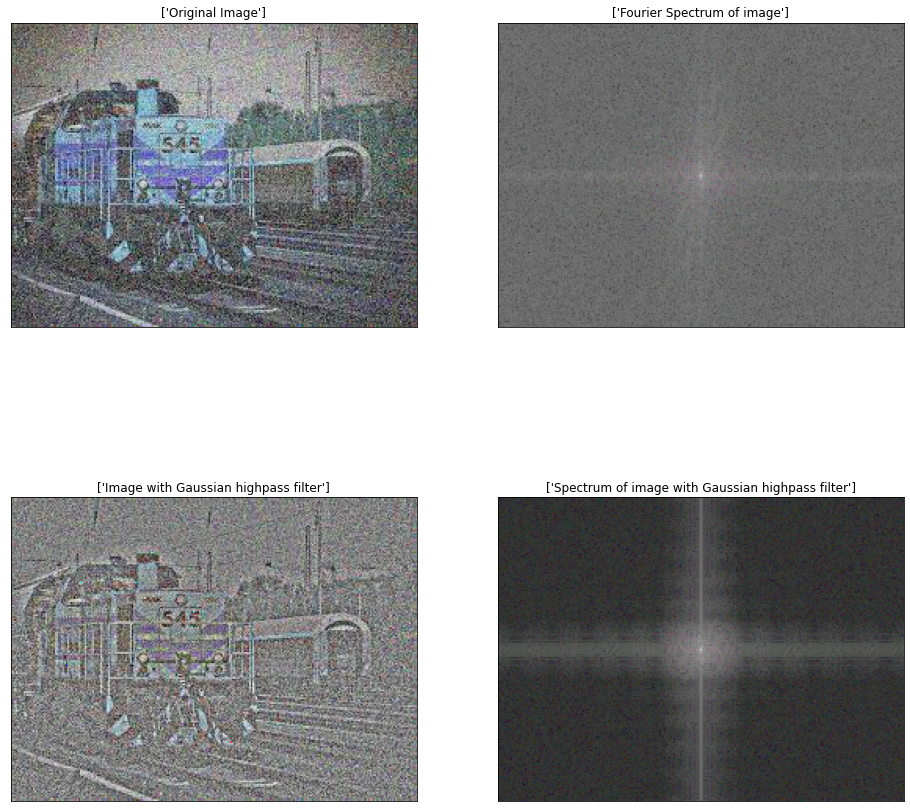

In [7]:
gauss_img_2 = new_gauss_blur(img,(105,105))
gauss_spec_2 = dft(gauss_img,(0,1))

img_list = [img,spec,gauss_img_2, gauss_spec_2]
title = ['Original Image','Fourier Spectrum of image',
         'Image with Gaussian highpass filter','Spectrum of image with Gaussian highpass filter']

plt.figure(figsize = (16,16))
for i in range(len(img_list)):
    plt.subplot(2,2,i+1)
    plt.title([title[i]])
    plt.imshow(img_list[i],cmap="RdGy")
    plt.yticks([]),plt.xticks([])

3. This time is somewhat difficult. You are asked to design Butterworth Notch Filter to3. This time is somewhat difficult. You are asked to design Butterworth Notch Filter toremove repetitive noise in the input imageremove repetitive noise in the input

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


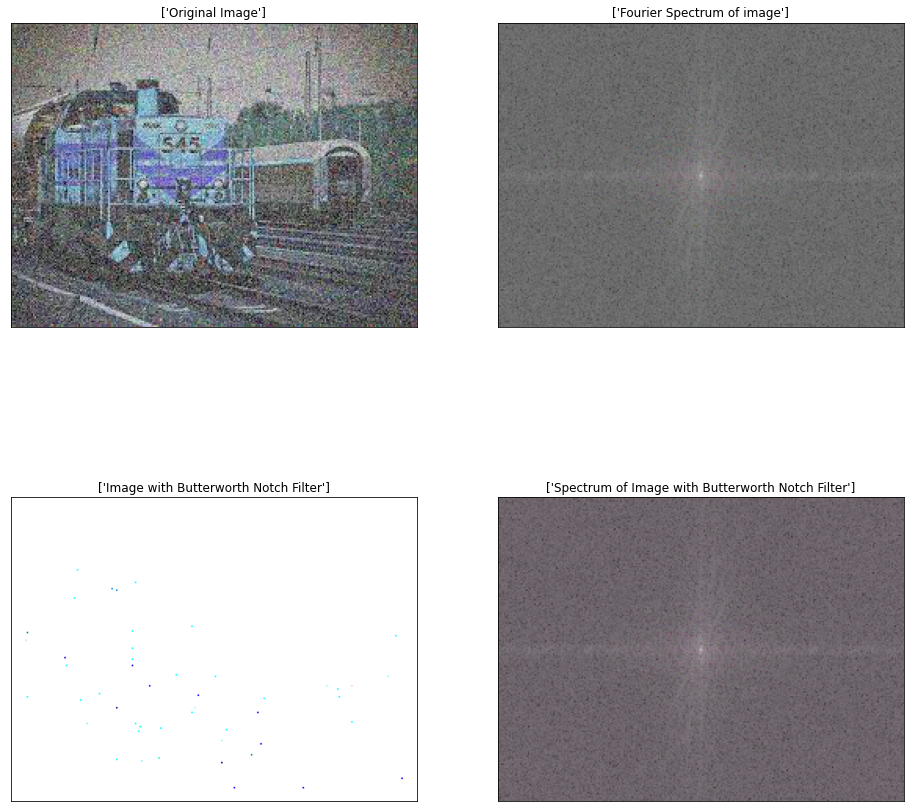

In [8]:
from scipy.signal import lfilter, iirnotch

x, y = iirnotch(100, Q=0.01, fs=255)
butter_notch = lfilter(x, y, img)
butter_notch_spec = dft(butter_notch,(0,1))
img_list = [img,spec,butter_notch,butter_notch_spec]
title = ['Original Image','Fourier Spectrum of image',
         'Image with Butterworth Notch Filter','Spectrum of Image with Butterworth Notch Filter']

plt.figure(figsize = (16,16))
for i in range(len(img_list)):
    plt.subplot(2,2,i+1)
    plt.title([title[i]])
    plt.imshow(img_list[i],cmap="RdGy")
    plt.yticks([]),plt.xticks([])